In [60]:
# !pip install -q -U llama-index-multi-modal-llms-anthropic
# !pip install -q -U llama-index-vector-stores-qdrant
# !pip install -q matplotlib
# !pip install -q  -U llama-index-readers-file

In [61]:
from google.colab import userdata
ANTHROPIC_API_KEY = userdata.get("ANTHROPIC_API_KEY")

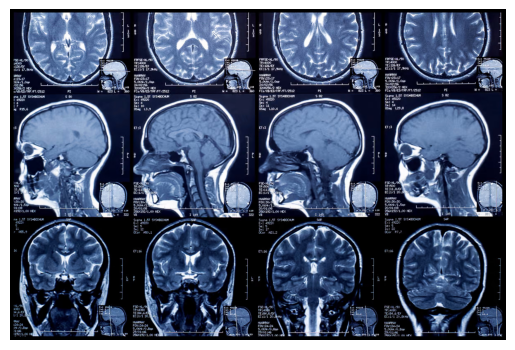

In [62]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/img_file/mri2.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [63]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal

In [64]:
# import os
# for i in os.listdir(img_dir_path):
#   print(i.split(".")[-1])

In [65]:
# img_dir_path = "/content/img_file"
# img_dir_path_list = [str(img_dir_path)+"/"+str(i) for i in os.listdir(img_dir_path) if i.split(".")[-1]=="jpg"]
# image_documents = SimpleDirectoryReader(input_files = img_dir_path_list).load_data()

In [66]:
# # put your local directore here
image_documents = SimpleDirectoryReader(input_files = [img_path]).load_data()
# # image_documents

In [67]:
# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(max_tokens = 300,
                                       api_key = ANTHROPIC_API_KEY)
# anthropic_mm_llm

In [68]:
user_query = f"""tell me about this report and provide me a general report."""

general_prompt = f"""You are a medical assistant. You are good at synthesis of medical images. Medical image including X-rays,
             computed tomography (CT), magnetic resonance imaging (MRI), and positron emission tomography (PET) would be provided to you.
             If there is a multiple portion into image then explore each portion and describe accrdingly. Your job is to provide
             the accurate answer based on the user query.

             \nUser query: {user_query}"""

In [69]:
response = anthropic_mm_llm.complete(prompt = general_prompt, image_documents = image_documents)

In [70]:
print(response)

This image shows a series of 8 MRI brain scans, likely from the same patient. The scans provide cross-sectional views of the brain from different angles and levels.

General report based on the MRI images:

1. The scans demonstrate normal brain anatomy without any obvious abnormalities, lesions, or shifts in brain structures.

2. The cerebral hemispheres appear symmetrical, with normal gray and white matter differentiation.

3. The ventricles (fluid-filled spaces in the brain) are of normal size and shape, without any signs of enlargement or compression.

4. The brainstem and cerebellum appear normal in size and structure.

5. No evidence of hemorrhage, mass effect, or midline shift is seen.

6. The basal cisterns and sulci are patent and not effaced.

7. The bony structures of the skull appear intact without any signs of fracture or abnormality.

In summary, this series of MRI brain scans does not reveal any significant abnormalities, suggesting a normal brain appearance. However, a d

In [71]:
from IPython.display import Markdown
Markdown(response.text)

This image shows a series of 8 MRI brain scans, likely from the same patient. The scans provide cross-sectional views of the brain from different angles and levels.

General report based on the MRI images:

1. The scans demonstrate normal brain anatomy without any obvious abnormalities, lesions, or shifts in brain structures.

2. The cerebral hemispheres appear symmetrical, with normal gray and white matter differentiation.

3. The ventricles (fluid-filled spaces in the brain) are of normal size and shape, without any signs of enlargement or compression.

4. The brainstem and cerebellum appear normal in size and structure.

5. No evidence of hemorrhage, mass effect, or midline shift is seen.

6. The basal cisterns and sulci are patent and not effaced.

7. The bony structures of the skull appear intact without any signs of fracture or abnormality.

In summary, this series of MRI brain scans does not reveal any significant abnormalities, suggesting a normal brain appearance. However, a definitive interpretation would require a radiologist's review and correlation with the patient's clinical history and presentation.